In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
import scipy
import scipy.io

In [4]:
with fits.open("../raw_data/north_pole/20071116/level1/eis_l1_20071116_072624.fits") as hdul:
    hdul.verify('fix')
    data = np.copy(hdul[1].data)

 [astropy.io.fits.verify]


In [5]:
hdul.info()

Filename: ../raw_data/north_pole/20071116/level1/eis_l1_20071116_072624.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     131   ()      
  1  DATA          1 BinTableHDU    311   7R x 25C   [524288E, 524288E, 524288E, 524288E, 1D, 1D, 1D, 1D, 1I, 1I, 1B, 1B, 1B, 1J, 1J, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   


In [6]:
hdul[0].header

SIMPLE  =                    T /Written by IDL:  Mon Dec  3 20:14:46 2007       
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /File contains extensions                        
DATE    = '2007-12-03'         /                                                
ORIGIN  = 'ISAS    '           /Institute where FITS file was written           
DATA_LEV=                    1 / FITS Level (0, 1, 2)                           
DATE_RF0= '2007-12-03T11:14:46.895' /Date and time of Level 0 reformat          
ORIG_RF0= 'ISAS    '           /Institution where Level 0 reformat was done     
VER_RF0 = 'EIS_Lev0_Reformatter $Revision: 1.22 $' /Fits Level 0 reformatter ver
DATE_RF1= '2021-05-06T14:15:17.563' / Date and time of Level 1 reformat         
ORIG_RF1= 'ITA-UiO '           / Institution where Level 1 reformat was done    
VER_RF1 = 'EIS_prep Ver $Rev

In [6]:
hdul[1].header

XTENSION= 'BINTABLE'           /Written by IDL:  Mon Dec  3 20:14:50 2007       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =              8388693 / Number of bytes per row                        
NAXIS2  =                    7 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                   25 /Number of columns                               
DATE    = '2007-12-03'         /                                                
ORIGIN  = 'ISAS    '           /Institute where FITS file was written           
DATA_LEV=                    1 / FITS Level (0, 1, 2)                           
DATE_RF0= '2007-12-03T11:14:46.895' /Date and time of Level 0 reformat          
ORIG_RF0= 'ISAS    '        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


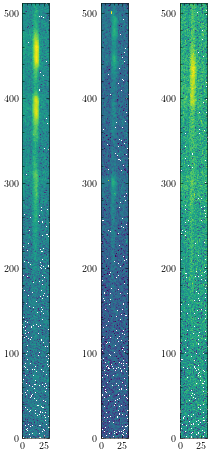

In [45]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(4,8))
ax1.imshow(np.log10(data[10][9]),origin="lower")
ax2.imshow(np.log10(data[30][9]),origin="lower")
ax3.imshow(np.log10(data[60][9]),origin="lower")

In [49]:
wvl_ref = scipy.io.readsav('../save/eis_wvl_slit2arcsec.sav')['wvl']

In [60]:
for ii in range(1,24):
    header_name = "TWMIN"+str(ii)
    index = np.argmin(np.abs(hdul[1].header[header_name]-wvl_ref))
    print(ii+1,index,wvl_ref[index]-hdul[1].header[header_name])

2 604 0.004691216346316196
3 680 0.004700409303097786
4 766 0.004708069424282257
5 826 0.004714642328309537
6 885 0.004725563255590259
7 954 0.004725477656279509
8 1036 0.00473356108230405
9 1148 0.004752943283875766
10 1252 0.004754617283907692
11 1534 0.004788278064324913
12 1575 0.004790468535588843
13 1655 0.004797343815596378
14 2495 -0.007571979009895813
15 2704 -0.007508837216846587
16 2792 -0.007482384419972732
17 2860 -0.007455713802414721
18 3127 -0.007372597123435298
19 3348 -0.007304215796011704
20 3409 -0.007281794940297459
21 3484 -0.007254600592830229
22 3546 -0.007235055306864524
23 3590 -0.007221261052450245
24 3744 -0.007178399744816488
